# Exercice 2

## Modules Utilisés

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1. Affichez l'image "*Singe.jpg*"

In [2]:
fichierSinge = "Singe.jpg"
imgSinge = cv2.imread(fichierSinge, cv2.IMREAD_COLOR)
cv2.imshow('Image originale',imgSinge)
cv2.waitKey(0)

-1

## 2. Ecrivez une fonction qui redimensionne une image

In [3]:
def Redimensionner(img, hauteur, largeur):
    fichierImg=cv2.imread(img, cv2.IMREAD_COLOR)
    imgResize=cv2.resize(fichierImg,(largeur, hauteur), interpolation=cv2.INTER_AREA)
    return imgResize

NouvelleImage=Redimensionner("Singe.jpg",400,1000)
cv2.imshow('Image redimensionnée',NouvelleImage)
cv2.waitKey(0)

-1

## 3. Ecrivez une fonction qui retourne une image verticalement

In [4]:
def Retourner(img, hauteur, largeur):
    fichierImg=cv2.imread(img, cv2.IMREAD_COLOR)
    flipImg=cv2.flip(fichierImg,0)
    return flipImg

NouvelleImage=Retourner("Singe.jpg",400,1000)
cv2.imshow('Image retournee',NouvelleImage)
cv2.waitKey(0)

-1

## 4. Affichez les histogrammes des différents canaux de votre image

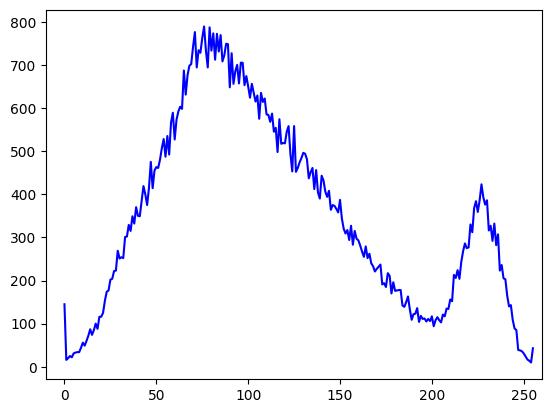

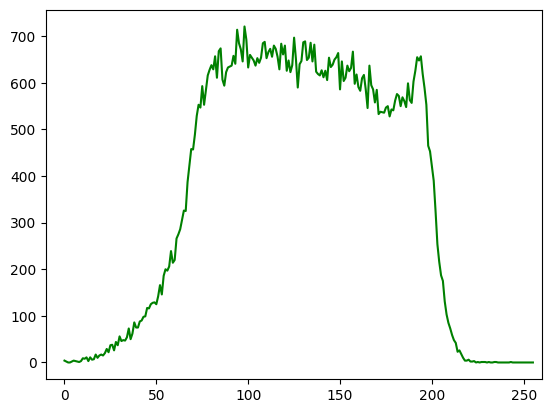

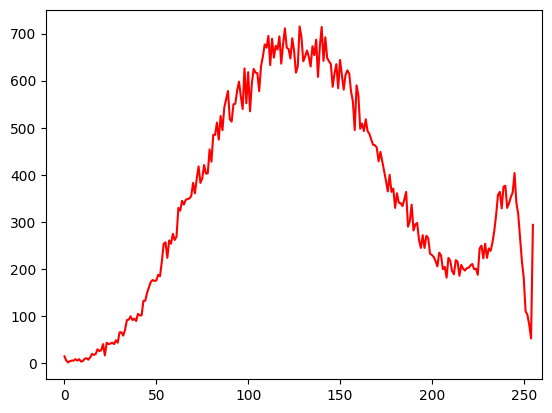

In [5]:
color = ["b","g","r"]
for i in range(0,3):
    histogramme = cv2.calcHist([imgSinge],[i],None,[256],[0,256])
    plt.plot(histogramme, color=color[i])
    plt.xlim([-10,260])
    plt.show()

## 5. Convertissez l'image en gris

In [6]:
imgGris = cv2.cvtColor(imgSinge, cv2.COLOR_RGB2GRAY)
cv2.imshow('Image en gris',imgGris)
cv2.waitKey(0)

-1

## 6. Affichez l’histogramme de l’image en niveau de gris

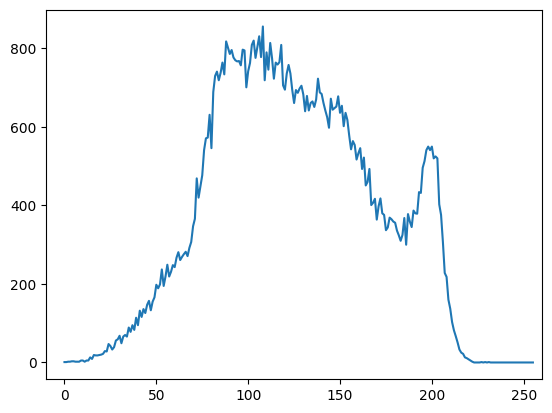

In [7]:
histogramme = cv2.calcHist([imgGris],[0],None,[256],[0,256])
plt.plot(histogramme)
plt.xlim([-10,260])
plt.show()

## 7. Affichez le résulat suivant
- Sur la permière ligne :
  - Un singe normal / Un singe inversé / Un singe en noir et blanc
- Sur la deuxième ligne :
  - Une image noire dont 1/4 est un singe / Deux images noires

In [8]:
hauteur, largeur = 360, 360

# Chargement et redimensionnement des images à la même taille
imgSinge = cv2.imread("Singe.jpg")
imgSingeR = cv2.resize(imgSinge, (largeur, hauteur), interpolation=cv2.INTER_AREA)
imgGris = cv2.imread("Singe.jpg", cv2.IMREAD_GRAYSCALE)
imgGrisR = cv2.resize(imgGris, (largeur, hauteur), interpolation=cv2.INTER_AREA)
imgRetourne = cv2.imread("Singe.jpg")
imgRetourneR = cv2.flip((cv2.resize(imgRetourne, (largeur, hauteur), interpolation=cv2.INTER_AREA)),0)

# Conversion de l'image en niveaux de gris en BGR pour l'affichage
imgGrisFFT = cv2.cvtColor(imgGrisR, cv2.COLOR_GRAY2BGR)

# Image Noire
imgNoirePetite = np.zeros([180,180,3], np.uint8)
imgNoireGrande = np.zeros([360,360,3], np.uint8)

# 1/4 de Singe
singePetit = cv2.resize(imgSinge, (180, 180), interpolation=cv2.INTER_AREA)
singeMoitie = np.concatenate((singePetit, imgNoirePetite), axis=1)
noirMoitie = np.concatenate((imgNoirePetite, imgNoirePetite), axis=1)
singeUnQuart = np.concatenate((singeMoitie, noirMoitie), axis=0)
singeCompletBas = np.concatenate((singeUnQuart, imgNoireGrande, imgNoireGrande), axis=1)

# Affichage des images dans une grille
singeCompletHaut = np.concatenate((imgSingeR, imgRetourneR, imgGrisFFT), axis=1)
displayGridFull = np.concatenate((singeCompletHaut,singeCompletBas), axis=0)

cv2.imshow('Grid', displayGridFull)
cv2.waitKey(0)
cv2.destroyAllWindows()